# Reading data with netCDF4

**Link to documentation:** http://unidata.github.io/netcdf4-python/

### Environment installation

`conda create -n nc4 python=3.6 jupyter nb_conda_kernels numpy scipy matplotlib netcdf4`

Remember to change the kernel in the dropdown menu in Jupyter notebook to that of the newly created environment.

As always, we first run `%pylab inline` to embed figures into the notebook. Additionally, we `import` the `scipy.io.netcdf4` package to let us import data from another file.

In [1]:
%pylab inline
import netCDF4

Populating the interactive namespace from numpy and matplotlib


## Inputting the Data
We read the dataset using the `Dataset` function from netCDF4. It is interesting to note that the variables here include all of the metadata that were previously accessed through looping through each variables' `._attributes`.

Information on how to do that with netcdf is here as well as descriptions of metadata is here: https://github.com/M6ASP/getting-started/blob/master/Reading%20data%20with%20scipy.io.netcdf.ipynb

In [2]:
from netCDF4 import Dataset
ncf = Dataset('example_data/WOA13_annual_SST_nc3_classic.nc', "r", format="NetCDF4")

For more detailed information on the metadata in this file, see: https://github.com/M6ASP/getting-started/blob/master/Reading%20metadata%20with%20netcdf4.ipynb

We assign variables `lat`, `lon`, and `tos` to their corresponding values from the ordered dict above.

In [3]:
lat = ncf.variables['lat']
lon = ncf.variables['lon']
tos = ncf.variables['tos']

In [4]:
tos

<class 'netCDF4._netCDF4.Variable'>
float32 tos(lat, lon)
    standard_name: sea_surface_temperature
    long_name: Objectively analyzed mean fields for sea_surface_temperature at standard depth levels.
    coordinates: time lat lon depth
    cell_methods: area: mean depth: mean time: mean
    grid_mapping: crs
    units: degrees_celsius
    _FillValue: 9.96921e+36
unlimited dimensions: 
current shape = (180, 360)
filling off

When we access the array data in `tos`, we see that netCDF4 has conveniently masked the `_FillValue`s already. Indeed when we plot below, we see that the land masses are correctly uncolored, and the only differences in color in the plot are in the bodies of water.

In [5]:
tos[:]

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [-1.5491100549697876, -1.5532100200653076, -1.5553100109100342,
         ..., -1.5446100234985352, -1.5458099842071533,
         -1.546910047531128],
        [-1.5583100318908691, -1.5600099563598633, -1.561110019683838,
         ..., -1.5565099716186523, -1.5568000078201294,
         -1.5574100017547607],
        [-1.5742100477218628, -1.5742100477218628, -1.5742100477218628,
         ..., -1.5742100477218628, -1.5742100477218628,
         -1.5742100477218628]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=9.96921e+36

Now, we can correctly plot the map.

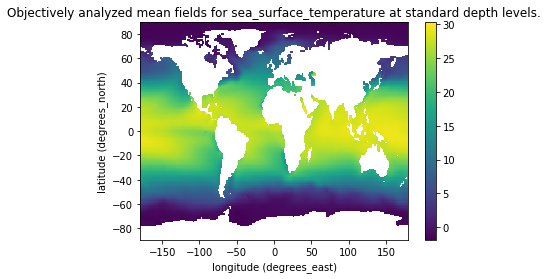

In [10]:
plt.pcolormesh(lon[:], lat[:], tos[:] )
plt.colorbar();
plt.title(tos.long_name);
plt.xlabel('%s (%s)' %(lon.long_name, lon.units));
plt.ylabel('%s (%s)' %(lat.long_name, lat.units));